In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
plt.style.use("fivethirtyeight")
from IPython.core.display import HTML
css = open('/Users/georgemcintire/Data Science:Python/pycon-pandas-tutorial/style-table.css').read() + open('/Users/georgemcintire/Data Science:Python/pycon-pandas-tutorial/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/georgemcintire/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load in database of police violence victims from Fatal Encounters https://numeracy.co/projects/1rZPfKbUtxa

In [2]:
fe = pd.read_csv("fatal_encounters_form_responses.csv")

In [3]:
fe["county_state"] = fe["Location of death (county)"] + ", " + fe["Location of death (state)"]

In [8]:

fe["year"] = pd.to_datetime(fe["Date of injury resulting in death (month/day/year)"])
fe["year"] = fe["year"].dt.year

In [9]:
df = fe[(fe["year"]>=2013) & (fe["year"] <2016)]

In [58]:
fe.iloc[:,10:25]

,Location of death (zip code),Location of death (county),Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Link to news article or photo of official document,Symptoms of mental illness?,Unique identifier/submitted by,Email address,Date&Description,11883,Unique identifier,Unnamed: 23,Unnamed: 24
0,60466.0,Cook,Park Forest Police Department,Gunshot,Park Forest Police were investigating a break-...,Pending investigation,http://chicago.cbslocal.com/2016/03/19/suspect...,No,NaN,NaN,3/19/2016: Park Forest Police were investigati...,11883,11883,NaN,NaN
1,42442.0,Hopkins,Kentucky State Police,Gunshot,Kentucky State Police says a trooper was invol...,Pending investigation,http://www.wbko.com/content/news/KSP-Trooper-i...,No,NaN,NaN,3/19/2016: Kentucky State Police says a troope...,11882,11882,NaN,NaN
2,23518.0,Norfolk City,Norfolk Police Department,Gunshot,Police said Beaty threatened a man with a repl...,Pending investigation,http://wtkr.com/2016/03/19/woman-killed-in-off...,No,NaN,NaN,3/19/2016: Police said Beaty threatened a man ...,NaN,11881,NaN,NaN
3,94514.0,Contra Costa,Contra Costa County Sheriff’s Office,Gunshot,Police went to arrest a man for child molestat...,Pending investigation,http://www.sfgate.com/crime/article/Police-sho...,No,NaN,NaN,3/18/2016: Police went to arrest a man for chi...,NaN,11880,NaN,NaN
4,29607.0,Greenville,Greenville Police Department,Gunshot,Officer Allen Jacobs and his partner were on p...,Pending investigation,http://www.greenvilleonline.com/story/news/cri...,No,NaN,NaN,3/18/2016: Officer Allen Jacobs and his partne...,NaN,11879,NaN,NaN
5,33611.0,Hillsborough,Tampa Police Department,Gunshot,Police say officers responded to a domestic di...,Pending investigation,http://www.baynews9.com/content/news/baynews9/...,No,NaN,NaN,3/17/2016: Police say officers responded to a ...,NaN,11878,NaN,NaN
6,55337.0,Dakota,Burnsville Police Department,Gunshot,Officers responded to a call about a man actin...,Pending investigation,http://www.startribune.com/five-officers-named...,No,NaN,NaN,3/17/2016: Officers responded to a call about ...,NaN,11877,NaN,NaN
7,15059.0,Beaver,"Midland Police Department, Ohioville Police De...",Gunshot,"Authorities said Shorak, who had been drinking...",Pending investigation,http://www.wpxi.com/news/news/local/shots-fire...,Drug or alcohol use,NaN,NaN,"3/17/2016: Authorities said Shorak, who had be...",NaN,11876,NaN,NaN
8,29588.0,Horry,Horry County Police Department,Gunshot,Police responded to a suicidal call. After a f...,Suicide,http://www.myrtlebeachonline.com/news/local/ar...,Yes,NaN,NaN,3/17/2016: Police responded to a suicidal call...,NaN,11875,NaN,NaN
9,77037.0,Harris,Houston Police Department,Gunshot,Police were surveiling five suspects who attem...,Pending investigation,http://www.brownsvilleherald.com/news/texas/ar...,No,NaN,NaN,3/17/2016: Police were surveiling five suspect...,NaN,11874,NaN,NaN


Load in table of every zip code and their information in America and clean table.

In [10]:
zipcodes = pd.read_csv("~/Downloads/us_postal_codes.csv", dtype="str")

In [11]:
del zipcodes["Unnamed: 7"]

In [12]:
def add_zeroes(x):
    if len(x) == 3:
        return "00" + str(x)
    elif len(x) == 4:
        return "0" + str(x)
    else:
        return str(x)

In [13]:
zipcodes["zip_codes"] = zipcodes["Postal Code"].astype(str)

In [14]:
zipcodes["zip_codes"] = zipcodes.zip_codes.apply(add_zeroes)

In [15]:
zc = zipcodes.iloc[:43582, :].copy()

In [16]:
zc.dtypes

Postal Code           object
Place Name            object
State                 object
State Abbreviation    object
County                object
Latitude              object
Longitude             object
zip_codes             object
dtype: object

In [17]:
def add_zero_2(x):
    if x<1000:
        return "00" + str(x)
    elif x>=1000 and 10000> x:
        return "0" + str(x)
    else:
        return str(x)

In [18]:
zc["code"] = zc["Postal Code"].apply(add_zero_2)

In [19]:
# zc
del zc["Postal Code"]
del zc["zip_codes"]

In [20]:
zc.head()

,Place Name,State,State Abbreviation,County,Latitude,Longitude,code
0,Portsmouth,New Hampshire,NH,Rockingham,43.0059,-71.0132,00210
1,Portsmouth,New Hampshire,NH,Rockingham,43.0059,-71.0132,00211
2,Portsmouth,New Hampshire,NH,Rockingham,43.0059,-71.0132,00212
3,Portsmouth,New Hampshire,NH,Rockingham,43.0059,-71.0132,00213
4,Portsmouth,New Hampshire,NH,Rockingham,43.0059,-71.0132,00214


This is where I made a table of unique zip codes from my Fatal Encounters database. Then I assigned each zip code a "1" which indicates that zip code has experienced at least one police office involved death. All other zip codes will be assigned a "0" when I join this table with my census data. This will be my target variable in logistic regression.

In [21]:
counts = pd.DataFrame(df["Location of death (zip code)"].unique(), columns=["code"])

In [22]:
counts["target"] =1

In [23]:
counts.head()

,code,target
0,89117,1
1,93701,1
2,82301,1
3,95322,1
4,91770,1


In [25]:
pd.merge(counts,zc, on="code").head()

,code,target,Place Name,State,State Abbreviation,County,Latitude,Longitude
0,89117,1,Las Vegas,Nevada,NV,Clark,36.1302,-115.2755
1,93701,1,Fresno,California,CA,Fresno,36.7487,-119.7867
2,82301,1,Rawlins,Wyoming,WY,Carbon,41.7951,-107.2349
3,95322,1,Gustine,California,CA,Merced,37.2001,-121.0047
4,91770,1,Rosemead,California,CA,Los Angeles,34.0658,-118.0853


In [26]:
zc.code.replace(".0", "")

0        00210
1        00211
2        00212
3        00213
4        00214
5        00215
6        00401
7        00501
8        00544
9        01001
10       01002
11       01003
12       01004
13       01005
14       01007
15       01008
16       01009
17       01010
18       01011
19       01012
20       01013
21       01014
22       01020
23       01021
24       01022
25       01026
26       01027
27       01028
28       01029
29       01030
         ...  
43552    99811
43553    99812
43554    99820
43555    99821
43556    99824
43557    99825
43558    99826
43559    99827
43560    99829
43561    99830
43562    99832
43563    99833
43564    99835
43565    99836
43566    99840
43567    99841
43568    99850
43569    99901
43570    99903
43571    99918
43572    99919
43573    99921
43574    99922
43575    99923
43576    99925
43577    99926
43578    99927
43579    99928
43580    99929
43581    99950
Name: code, dtype: object

In [28]:
zipcodes.rename(columns={"Postal Code": "code"}, inplace= True)


In [29]:
zc = zipcodes.copy()

In [30]:
zc = zc.iloc[:43582, :].copy()

In [31]:
df = pd.merge(counts,zc, on="code", how="outer")

In [32]:
df["target"]=df.target.fillna(0)

In [33]:
df.target.value_counts()

0    40677
1     2910
Name: target, dtype: int64

In [34]:
df = df.dropna()

In [35]:
df.target.value_counts()

0    39268
1     2883
Name: target, dtype: int64

In [36]:
from sklearn import datasets

This is where I load in and clean up census data at a zip code level. I use this data to make one big table of the demographic features I plan to use to predict the probability of a police officer involved death.

In [37]:
"""Zip code gini coeffecients"""
gini = pd.read_csv("/Users/georgemcintire/Downloads/aff_download (1)/ACS_14_5YR_B19083_with_ann.csv", dtype="object")

In [38]:
gini.shape

(33121, 5)

In [39]:
"""Zip code acial demographics """
race_populations = pd.read_csv("/Users/georgemcintire/Downloads/aff_download (1)/ACS_14_5YR_B02001_with_ann.csv", dtype="object")

In [40]:
race_populations.shape

(33121, 23)

In [41]:
# race_populations

In [42]:
"""Zip code education information"""
education = pd.read_csv("/Users/georgemcintire/Downloads/aff_download (1)/ACS_14_5YR_B15003_with_ann.csv", dtype="object")

In [43]:
education.shape

(33121, 53)

In [44]:
education.iloc[:5,31:]

,HD01_VD15,HD02_VD15,HD01_VD16,HD02_VD16,HD01_VD17,HD02_VD17,HD01_VD18,HD02_VD18,HD01_VD19,HD02_VD19,...,HD01_VD21,HD02_VD21,HD01_VD22,HD02_VD22,HD01_VD23,HD02_VD23,HD01_VD24,HD02_VD24,HD01_VD25,HD02_VD25
0,Estimate; Total: - 11th grade,Margin of Error; Total: - 11th grade,"Estimate; Total: - 12th grade, no diploma","Margin of Error; Total: - 12th grade, no diploma",Estimate; Total: - Regular high school diploma,Margin of Error; Total: - Regular high school ...,Estimate; Total: - GED or alternative credential,Margin of Error; Total: - GED or alternative c...,"Estimate; Total: - Some college, less than 1 year","Margin of Error; Total: - Some college, less t...",...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school ...,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
1,420,115,225,100,2913,336,108,63,84,59,...,672,159,1617,253,233,82,58,49,70,55
2,677,179,128,81,4497,433,891,201,191,81,...,3927,476,4440,545,1110,213,197,146,217,141
3,883,204,308,110,8390,548,1537,264,398,139,...,3180,400,5407,534,1599,302,254,110,319,120
4,70,46,40,41,1558,302,42,38,51,46,...,79,44,419,134,28,28,17,26,33,34


In [45]:
education.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HD01_VD01', u'HD02_VD01',
       u'HD01_VD02', u'HD02_VD02', u'HD01_VD03', u'HD02_VD03', u'HD01_VD04',
       u'HD02_VD04', u'HD01_VD05', u'HD02_VD05', u'HD01_VD06', u'HD02_VD06',
       u'HD01_VD07', u'HD02_VD07', u'HD01_VD08', u'HD02_VD08', u'HD01_VD09',
       u'HD02_VD09', u'HD01_VD10', u'HD02_VD10', u'HD01_VD11', u'HD02_VD11',
       u'HD01_VD12', u'HD02_VD12', u'HD01_VD13', u'HD02_VD13', u'HD01_VD14',
       u'HD02_VD14', u'HD01_VD15', u'HD02_VD15', u'HD01_VD16', u'HD02_VD16',
       u'HD01_VD17', u'HD02_VD17', u'HD01_VD18', u'HD02_VD18', u'HD01_VD19',
       u'HD02_VD19', u'HD01_VD20', u'HD02_VD20', u'HD01_VD21', u'HD02_VD21',
       u'HD01_VD22', u'HD02_VD22', u'HD01_VD23', u'HD02_VD23', u'HD01_VD24',
       u'HD02_VD24', u'HD01_VD25', u'HD02_VD25'],
      dtype='object')

In [46]:
education.iloc[0:2,:]

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,...,HD01_VD21,HD02_VD21,HD01_VD22,HD02_VD22,HD01_VD23,HD02_VD23,HD01_VD24,HD02_VD24,HD01_VD25,HD02_VD25
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school ...,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
1,8600000US00601,00601,ZCTA5 00601,11877,188,409,95,0,20,0,...,672,159,1617,253,233,82,58,49,70,55


In [47]:
gini.rename(columns={"GEO.id2":"code"}, inplace=True)

In [48]:
gini.head()

,GEO.id,code,GEO.display-label,HD01_VD01,HD02_VD01
0,Id,Id2,Geography,Estimate; Gini Index,Margin of Error; Gini Index
1,8600000US00601,00601,ZCTA5 00601,0.6001,0.0310
2,8600000US00602,00602,ZCTA5 00602,0.5136,0.0361
3,8600000US00603,00603,ZCTA5 00603,0.5498,0.0225
4,8600000US00606,00606,ZCTA5 00606,0.4844,0.0360


In [49]:
pd.merge(df, gini, on="code").head()

,code,target,Place Name,State,State Abbreviation,County,Latitude,Longitude,zip_codes,GEO.id,GEO.display-label,HD01_VD01,HD02_VD01
0,89117,1,Las Vegas,Nevada,NV,Clark,36.1302,-115.2755,89117,8600000US89117,ZCTA5 89117,0.4546,0.0213
1,93701,1,Fresno,California,CA,Fresno,36.7487,-119.7867,93701,8600000US93701,ZCTA5 93701,0.4636,0.0379
2,82301,1,Rawlins,Wyoming,WY,Carbon,41.7951,-107.2349,82301,8600000US82301,ZCTA5 82301,0.3744,0.0259
3,95322,1,Gustine,California,CA,Merced,37.2001,-121.0047,95322,8600000US95322,ZCTA5 95322,0.4844,0.0550
4,91770,1,Rosemead,California,CA,Los Angeles,34.0658,-118.0853,91770,8600000US91770,ZCTA5 91770,0.4339,0.0120


In [50]:
race_populations.shape

(33121, 23)

In [51]:
race_populations.iloc[0:2,:]

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,...,HD01_VD06,HD02_VD06,HD01_VD07,HD02_VD07,HD01_VD08,HD02_VD08,HD01_VD09,HD02_VD09,HD01_VD10,HD02_VD10
0,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - White alone,Margin of Error; Total: - White alone,Estimate; Total: - Black or African American a...,Margin of Error; Total: - Black or African Ame...,Estimate; Total: - American Indian and Alaska ...,...,Estimate; Total: - Native Hawaiian and Other P...,Margin of Error; Total: - Native Hawaiian and ...,Estimate; Total: - Some other race alone,Margin of Error; Total: - Some other race alone,Estimate; Total: - Two or more races:,Margin of Error; Total: - Two or more races:,Estimate; Total: - Two or more races: - Two ra...,Margin of Error; Total: - Two or more races: -...,Estimate; Total: - Two or more races: - Two ra...,Margin of Error; Total: - Two or more races: -...
1,8600000US00601,00601,ZCTA5 00601,18088,295,17408,374,175,105,5,...,0,20,431,248,69,53,24,22,45,43


In [52]:
race_pop_new_columns = dict(zip(race_populations.columns, race_populations.iloc[0,:]))

In [53]:
race_populations.rename(columns=race_pop_new_columns, inplace=True)

In [54]:
race_populations.drop(0, inplace=True)

In [55]:
race = race_populations.copy()

In [243]:
# race.head(2)

In [56]:
# race.columns

In [57]:
race["white_share"] = race["Estimate; Total: - White alone"].astype(float)/race["Estimate; Total:"].astype(float)

In [58]:
race["black_share"] = race['Estimate; Total: - Black or African American alone'].astype(float)/race["Estimate; Total:"].astype(float)

In [61]:
race.head()

,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - White alone,Margin of Error; Total: - White alone,Estimate; Total: - Black or African American alone,Margin of Error; Total: - Black or African American alone,Estimate; Total: - American Indian and Alaska Native alone,...,Estimate; Total: - Some other race alone,Margin of Error; Total: - Some other race alone,Estimate; Total: - Two or more races:,Margin of Error; Total: - Two or more races:,Estimate; Total: - Two or more races: - Two races including Some other race,Margin of Error; Total: - Two or more races: - Two races including Some other race,"Estimate; Total: - Two or more races: - Two races excluding Some other race, and three or more races","Margin of Error; Total: - Two or more races: - Two races excluding Some other race, and three or more races",white_share,black_share
1,8600000US00601,00601,ZCTA5 00601,18088,295,17408,374,175,105,5,...,431,248,69,53,24,22,45,43,0.962406,0.009675
2,8600000US00602,00602,ZCTA5 00602,40859,154,23919,1316,1097,365,27,...,1520,543,14221,1345,148,124,14073,1334,0.585403,0.026848
3,8600000US00603,00603,ZCTA5 00603,53162,657,38809,1406,1913,430,75,...,3567,759,8169,1065,275,218,7894,1024,0.730014,0.035984
4,8600000US00606,00606,ZCTA5 00606,6415,264,5621,347,154,109,0,...,519,249,121,125,36,57,85,114,0.876228,0.024006
5,8600000US00610,00610,ZCTA5 00610,28805,163,19336,1130,1002,468,0,...,5568,836,2873,643,87,63,2786,654,0.671272,0.034786


In [63]:
race_df = race[["code","Estimate; Total:", "white_share", "black_share"]]

In [62]:
race["code"] = race["Id2"]

In [64]:
race_df.head()

,code,Estimate; Total:,white_share,black_share
1,00601,18088,0.962406,0.009675
2,00602,40859,0.585403,0.026848
3,00603,53162,0.730014,0.035984
4,00606,6415,0.876228,0.024006
5,00610,28805,0.671272,0.034786


In [65]:
gini_new_columns = dict(zip(gini.columns, gini.iloc[0,:]))
gini.rename(columns=gini_new_columns, inplace=True)

In [66]:
gini.drop(0, inplace=True)
gini.rename(columns={"Id2":"code"}, inplace=True)
gini.head()

,Id,code,Geography,Estimate; Gini Index,Margin of Error; Gini Index
1,8600000US00601,00601,ZCTA5 00601,0.6001,0.0310
2,8600000US00602,00602,ZCTA5 00602,0.5136,0.0361
3,8600000US00603,00603,ZCTA5 00603,0.5498,0.0225
4,8600000US00606,00606,ZCTA5 00606,0.4844,0.0360
5,8600000US00610,00610,ZCTA5 00610,0.4530,0.0207


In [67]:
del gini["Id"]
del gini["Geography"]
del gini["Margin of Error; Gini Index"]

In [68]:
race_df.shape

(33120, 4)

In [69]:
gini.shape

(33120, 2)

In [70]:
table = pd.merge(gini, race_df, on="code")

In [71]:
from pprint import pprint

In [72]:
education_new_columns = dict(zip(education.columns, education.iloc[0,:]))


In [73]:
education.rename(columns=education_new_columns, inplace=True)


In [74]:
education.drop(0, inplace=True)

In [75]:
edu = education[[1,]]

In [76]:
a = education["Estimate; Total: - Doctorate degree"].astype(float) + education["Estimate; Total: - Professional school degree"].astype(float) + education["Estimate; Total: - Master's degree"].astype(float)


In [77]:
b = a + education["Estimate; Total: - Bachelor's degree"].astype(float) + education["Estimate; Total: - Associate's degree"].astype(float) + education["Estimate; Total: - Some college, 1 or more years, no degree"].astype(float)

In [87]:
c = b + education["Estimate; Total: - Some college, less than 1 year"].astype(float) + education["Estimate; Total: - GED or alternative credential"].astype(float) + education["Estimate; Total: - Regular high school diploma"].astype(float)

In [94]:
c = c.astype(float)

In [95]:
d = education["Estimate; Total:"].astype(float).copy()


In [102]:
edu["no_hs_degree"] = d - c.copy()

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [103]:
edu["code"] = education.Id2

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
edu = edu.copy()

In [105]:
edu.head()

,Id2,no_hs_degree,code
1,00601,4848,00601
2,00602,10406,00602
3,00603,11712,00603
4,00606,1869,00606
5,00610,6857,00610


In [106]:
del edu["Id2"]

In [107]:
edu.head()

,no_hs_degree,code
1,4848,00601
2,10406,00602
3,11712,00603
4,1869,00606
5,6857,00610


In [109]:
edu = edu[[1,0]]

In [110]:
table.shape

(33120, 5)

In [111]:
table = pd.merge(table, edu, on="code")

In [112]:
test = table.copy()

In [113]:
del df["Latitude"], df["Longitude"]

In [114]:
#success!
w = pd.merge(df, test, on="code")

In [115]:
test.head()

,code,Estimate; Gini Index,Estimate; Total:,white_share,black_share,no_hs_degree
0,00601,0.6001,18088,0.962406,0.009675,4848
1,00602,0.5136,40859,0.585403,0.026848,10406
2,00603,0.5498,53162,0.730014,0.035984,11712
3,00606,0.4844,6415,0.876228,0.024006,1869
4,00610,0.4530,28805,0.671272,0.034786,6857


In [116]:
w.target.mean()

0.08760390974696264

In [117]:
"""Load in the census data on poverty"""
poverty = pd.read_csv("/Users/georgemcintire/Downloads/aff_download (1)/ACS_14_5YR_S1701_with_ann.csv", dtype="object")

In [118]:
poverty.shape

(33121, 279)

In [119]:
poverty_new_columns = dict(zip(poverty.columns, poverty.iloc[0,:]))

In [120]:
poverty.rename(columns=poverty_new_columns, inplace=True)

In [121]:
poverty.drop(0, inplace=True)

In [122]:
poverty.rename(columns={"Id2":"code"}, inplace=True)

In [126]:
zz = []
for i in poverty["Percent below poverty level; Estimate; Population for whom poverty status is determined"]:
    try:
        zz.append(float(i))
    except:
        pass

In [127]:
np.mean(zz)

15.520227544542918

In [128]:
def fix(x):
    if x == "-":
        return str(np.mean(zz))
    else:
        return x

In [129]:
poverty["poverty_rate"] = poverty["Percent below poverty level; Estimate; Population for whom poverty status is determined"].apply(fix)

In [130]:
poverty["poverty_rate"] = poverty["poverty_rate"].astype(float)

In [131]:
poverty["pov_rate_150"] = poverty["Total; Estimate; All Individuals below: - 150 percent of poverty level"].astype(float)

In [132]:
poverty["pov_rate_150"] = poverty["pov_rate_150"]/poverty["Total; Estimate; Population for whom poverty status is determined"].astype(float)

In [133]:
poverty["edu_attainment"] = poverty["Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over"].astype(float)

In [135]:
poverty.head()

,Id,code,Geography,Total; Estimate; Population for whom poverty status is determined,Total; Margin of Error; Population for whom poverty status is determined,Below poverty level; Estimate; Population for whom poverty status is determined,Below poverty level; Margin of Error; Population for whom poverty status is determined,Percent below poverty level; Estimate; Population for whom poverty status is determined,Percent below poverty level; Margin of Error; Population for whom poverty status is determined,Total; Estimate; AGE - Under 18 years,...,Percent below poverty level; Margin of Error; Did not work,Total; Estimate; PERCENT IMPUTED - Poverty status for individuals,Total; Margin of Error; PERCENT IMPUTED - Poverty status for individuals,Below poverty level; Estimate; PERCENT IMPUTED - Poverty status for individuals,Below poverty level; Margin of Error; PERCENT IMPUTED - Poverty status for individuals,Percent below poverty level; Estimate; PERCENT IMPUTED - Poverty status for individuals,Percent below poverty level; Margin of Error; PERCENT IMPUTED - Poverty status for individuals,poverty_rate,pov_rate_150,edu_attainment
1,8600000US00601,00601,ZCTA5 00601,17914,289,10911,675,60.9,3.7,4227,...,4.4,33.6,(X),(X),(X),(X),(X),60.9,0.742045,11857
2,8600000US00602,00602,ZCTA5 00602,40807,164,21724,1144,53.2,2.8,9000,...,5.7,12.3,(X),(X),(X),(X),(X),53.2,0.679663,27644
3,8600000US00603,00603,ZCTA5 00603,51761,671,26027,1494,50.3,2.8,11785,...,3.6,13.1,(X),(X),(X),(X),(X),50.3,0.648152,35069
4,8600000US00606,00606,ZCTA5 00606,6415,264,3778,400,58.9,6.0,1511,...,11.1,7.2,(X),(X),(X),(X),(X),58.9,0.788620,4270
5,8600000US00610,00610,ZCTA5 00610,28727,165,14149,1137,49.3,4.0,6461,...,5.9,11.7,(X),(X),(X),(X),(X),49.3,0.698715,19395


In [136]:
pov = poverty[["code","poverty_rate","pov_rate_150","edu_attainment"]].copy()

In [137]:
table = pd.merge(test, pov, on="code")

In [138]:
income = pd.read_csv("/Users/georgemcintire/Downloads/aff_download (1)/ACS_14_5YR_S1902_with_ann.csv", dtype="object")

In [139]:
income_new_columns = dict(zip(income.columns, income.iloc[0,:]))

In [140]:
income.rename(columns=income_new_columns, inplace=True)
income.rename(columns={"Id2":"code"}, inplace=True)

In [141]:
income.drop(0, inplace=True)

In [142]:
income.head(2)

,Id,code,Geography,Total; Estimate; All households,Total; Margin of Error; All households,Mean income (dollars); Estimate; All households,Mean income (dollars); Margin of Error; All households,Total; Estimate; All households - With earnings,Total; Margin of Error; All households - With earnings,Mean income (dollars); Estimate; All households - With earnings,...,Mean income (dollars); Estimate; PERCENT IMPUTED - Household income in the past 12 months,Mean income (dollars); Margin of Error; PERCENT IMPUTED - Household income in the past 12 months,Total; Estimate; PERCENT IMPUTED - Family income in the past 12 months,Total; Margin of Error; PERCENT IMPUTED - Family income in the past 12 months,Mean income (dollars); Estimate; PERCENT IMPUTED - Family income in the past 12 months,Mean income (dollars); Margin of Error; PERCENT IMPUTED - Family income in the past 12 months,Total; Estimate; PERCENT IMPUTED - Individual income in the past 12 months,Total; Margin of Error; PERCENT IMPUTED - Individual income in the past 12 months,Mean income (dollars); Estimate; PERCENT IMPUTED - Individual income in the past 12 months,Mean income (dollars); Margin of Error; PERCENT IMPUTED - Individual income in the past 12 months
1,8600000US00601,00601,ZCTA5 00601,5820,223,20330,2085,48.4,3.8,30191,...,(X),(X),45.2,(X),(X),(X),30.3,(X),(X),(X)
2,8600000US00602,00602,ZCTA5 00602,13046,404,24905,1930,55.3,2.7,28141,...,(X),(X),12.7,(X),(X),(X),9.6,(X),(X),(X)


In [382]:
# income["mean_income"] = income["Mean income (dollars); Estimate; All households"].astype(float)

In [143]:
bb = []
for i in income["Mean income (dollars); Estimate; All households"]:
    try:
        bb.append(float(i))
    except:
        pass

In [147]:
def fix2(x):
    if x == "-" or x == "N":
        return str(np.mean(bb))
    else:
        return x

In [148]:
income["Mean income (dollars); Estimate; All households"] = income["Mean income (dollars); Estimate; All households"].apply(fix2)

In [149]:
income["mean_income"] = income["Mean income (dollars); Estimate; All households"].astype(float)

In [150]:
inc = income[["code", "mean_income"]].copy()

In [151]:
table = pd.merge(table, inc, on="code")

In [152]:
median_income = pd.read_csv("/Users/georgemcintire/Downloads/aff_download (1)/ACS_14_5YR_S1903_with_ann.csv", dtype="object")

In [153]:
median_income.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC02,HC01_MOE_VC02,HC02_EST_VC02,HC02_MOE_VC02,HC01_EST_VC04,HC01_MOE_VC04,HC02_EST_VC04,...,HC02_EST_VC39,HC02_MOE_VC39,HC01_EST_VC40,HC01_MOE_VC40,HC02_EST_VC40,HC02_MOE_VC40,HC01_EST_VC41,HC01_MOE_VC41,HC02_EST_VC41,HC02_MOE_VC41
0,Id,Id2,Geography,Total; Estimate; Households,Total; Margin of Error; Households,Median income (dollars); Estimate; Households,Median income (dollars); Margin of Error; Hous...,Total; Estimate; Households - One race-- - White,Total; Margin of Error; Households - One race-...,Median income (dollars); Estimate; Households ...,...,Median income (dollars); Estimate; PERCENT IMP...,Median income (dollars); Margin of Error; PERC...,Total; Estimate; PERCENT IMPUTED - Family inco...,Total; Margin of Error; PERCENT IMPUTED - Fami...,Median income (dollars); Estimate; PERCENT IMP...,Median income (dollars); Margin of Error; PERC...,Total; Estimate; PERCENT IMPUTED - Nonfamily i...,Total; Margin of Error; PERCENT IMPUTED - Nonf...,Median income (dollars); Estimate; PERCENT IMP...,Median income (dollars); Margin of Error; PERC...
1,8600000US00601,00601,ZCTA5 00601,5820,223,10833,1531,96.4,1.2,10848,...,(X),(X),45.2,(X),(X),(X),33.1,(X),(X),(X)
2,8600000US00602,00602,ZCTA5 00602,13046,404,16353,977,58.4,2.8,15906,...,(X),(X),12.7,(X),(X),(X),12.4,(X),(X),(X)
3,8600000US00603,00603,ZCTA5 00603,18020,490,16323,872,73.0,2.4,16006,...,(X),(X),19.6,(X),(X),(X),13.9,(X),(X),(X)
4,8600000US00606,00606,ZCTA5 00606,1898,156,14138,2157,88.8,3.2,14773,...,(X),(X),14.3,(X),(X),(X),10.4,(X),(X),(X)


In [154]:
median_new_col = dict(zip(median_income.columns, median_income.iloc[0,:]))
median_income.rename(columns=median_new_col, inplace=True)
median_income.rename(columns={"Id2":"code"}, inplace=True)
median_income.drop(0, inplace=True)

In [161]:
ee = []
for i in median_income["Median income (dollars); Estimate; Households"]:
    try:
        ee.append(float(i))
    except:
        pass

In [162]:
def fix3(x):
    if x == "250,000":
        return "250000"
    elif x == "250,000+":
        return "275000"
    elif x == "2,500-":
        return "2500"
    elif x == "-":
        return np.mean(ee)
    else:
        return x

In [163]:
median_income["median_income"] = median_income["Median income (dollars); Estimate; Households"].apply(fix3)

In [164]:
median_income["median_income"] = median_income["median_income"].astype(float)

In [428]:
uu = []
for i in median_income["median_income"]:
    try:
        uu.append(float(i))
    except:
        pass

In [432]:
# median_income["median_income"]

In [165]:
med_inc = median_income[["code", "median_income"]].copy()

In [166]:
table = pd.merge(table, med_inc, on="code")

In [167]:
table.shape

(33120, 11)

In [168]:
"""Read in and clean unemployment data"""
un_rate = pd.read_csv("/Users/georgemcintire/Downloads/aff_download (1)/ACS_14_5YR_S2301_with_ann.csv", dtype="object")

In [169]:
un_new_col = dict(zip(un_rate.columns, un_rate.iloc[0,:]))
un_rate.rename(columns=un_new_col, inplace=True)
un_rate.rename(columns={"Id2":"code"}, inplace=True)
# un_rate.drop(0, inplace=True)

In [170]:
un_rate.drop(0, inplace=True)

In [171]:
un_rate.head()

,Id,code,Geography,Total; Estimate; Population 16 years and over,Total; Margin of Error; Population 16 years and over,In labor force; Estimate; Population 16 years and over,In labor force; Margin of Error; Population 16 years and over,Employed; Estimate; Population 16 years and over,Employed; Margin of Error; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,...,Unemployment rate; Estimate; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Unemployment rate; Margin of Error; EDUCATIONAL ATTAINMENT - Population 25 to 64 years - Bachelor's degree or higher,Total; Estimate; PERCENT IMPUTED - Employment status for population 16 years and over,Total; Margin of Error; PERCENT IMPUTED - Employment status for population 16 years and over,In labor force; Estimate; PERCENT IMPUTED - Employment status for population 16 years and over,In labor force; Margin of Error; PERCENT IMPUTED - Employment status for population 16 years and over,Employed; Estimate; PERCENT IMPUTED - Employment status for population 16 years and over,Employed; Margin of Error; PERCENT IMPUTED - Employment status for population 16 years and over,Unemployment rate; Estimate; PERCENT IMPUTED - Employment status for population 16 years and over,Unemployment rate; Margin of Error; PERCENT IMPUTED - Employment status for population 16 years and over
1,8600000US00601,00601,ZCTA5 00601,14243,239,42.4,2.4,28.4,2.3,33.0,...,17.1,6.0,7.2,(X),(X),(X),(X),(X),(X),(X)
2,8600000US00602,00602,ZCTA5 00602,33023,204,47.4,1.9,34.1,1.8,27.8,...,15.6,4.7,3.8,(X),(X),(X),(X),(X),(X),(X)
3,8600000US00603,00603,ZCTA5 00603,42917,510,38.3,1.6,28.8,1.6,24.7,...,12.3,3.4,5.8,(X),(X),(X),(X),(X),(X),(X)
4,8600000US00606,00606,ZCTA5 00606,5087,239,36.8,5.0,33.4,4.6,9.2,...,0.0,12.1,3.6,(X),(X),(X),(X),(X),(X),(X)
5,8600000US00610,00610,ZCTA5 00610,23255,218,40.1,2.5,34.6,2.3,13.8,...,3.4,2.6,5.2,(X),(X),(X),(X),(X),(X),(X)


In [465]:
# un_rate["Unemployment rate; Estimate; Population 16 years and over"].value_counts()

In [172]:
uu = []
for i in un_rate["Unemployment rate; Estimate; Population 16 years and over"]:
    try:
        uu.append(float(i))
    except:
        pass

In [173]:
def fix4(x):
    if x == "-":
        return str(np.mean(uu))
    else:
        return x

In [174]:
un_rate["un_rate"] = un_rate["Unemployment rate; Estimate; Population 16 years and over"].apply(fix4)

In [175]:
un_rate["un_rate"] = un_rate["un_rate"].astype(float)

In [176]:
ui = un_rate[["code", "un_rate"]].copy()

In [177]:
table = pd.merge(table, ui, on="code")

In [178]:
df[df.isnull()==False].shape

(42151, 7)

In [179]:
df.shape

(42151, 7)

In [180]:
table.dropna(inplace=True)

In [181]:
table.shape

(32609, 12)

In [182]:
final = pd.merge(df, table, on="code")

In [183]:
final.dtypes

code                     object
target                  float64
Place Name               object
State                    object
State Abbreviation       object
County                   object
zip_codes                object
Estimate; Gini Index     object
Estimate; Total:         object
white_share             float64
black_share             float64
no_hs_degree            float64
poverty_rate            float64
pov_rate_150            float64
edu_attainment          float64
mean_income             float64
median_income           float64
un_rate                 float64
dtype: object

In [185]:
final[final["Estimate; Gini Index"]== "-"].shape

(350, 18)

In [186]:
gi = []


for i in final["Estimate; Gini Index"]:
    try:
        gi.append(float(i))
    except:
        pass
    
def fix_gini(x):
    if x=="-":
        return str(np.mean(gi))
    else:
        return x
    
final["gini"] = final["Estimate; Gini Index"].apply(fix_gini)

In [187]:
final["gini"] = final["gini"].astype(float)

In [188]:
final["pop"] = final["Estimate; Total:"].astype(float)

In [189]:
del final["Estimate; Gini Index"], final["Estimate; Total:"]

In [190]:
final.shape

(32333, 18)

In [191]:
final.to_pickle("final.pkl")

In [192]:
final.to_csv("final.csv")

In [193]:
final.head()

,code,target,Place Name,State,State Abbreviation,County,zip_codes,white_share,black_share,no_hs_degree,poverty_rate,pov_rate_150,edu_attainment,mean_income,median_income,un_rate,gini,pop
0,89117,1,Las Vegas,Nevada,NV,Clark,89117,0.690471,0.071173,3919,11.6,0.190970,39569,76011,55095,9.7,0.4546,54234
1,93701,1,Fresno,California,CA,Fresno,93701,0.433630,0.061086,2953,60.8,0.759836,5469,25577,18553,21.6,0.4636,10788
2,82301,1,Rawlins,Wyoming,WY,Carbon,82301,0.888924,0.014690,833,15.8,0.209943,5566,67801,56863,4.0,0.3744,9462
3,95322,1,Gustine,California,CA,Merced,95322,0.890684,0.005271,1831,22.7,0.354739,5376,58920,40732,15.5,0.4844,8727
4,91770,1,Rosemead,California,CA,Los Angeles,91770,0.228632,0.002915,14959,19.0,0.342889,44374,61584,47078,12.9,0.4339,63119


In [194]:
final.groupby("target").mean()

,white_share,black_share,no_hs_degree,poverty_rate,pov_rate_150,edu_attainment,mean_income,median_income,un_rate,gini,pop
target,,,,,,,,,,,
0,0.856053,0.066806,662.490122,15.041375,0.253150,5181.590699,66681.241302,52904.999581,8.680016,0.406847,7846.083809
1,0.695598,0.166392,3107.811347,19.113192,0.301331,17875.296554,65467.747199,50106.299492,10.515767,0.441017,27964.415593


In [195]:
final.groupby("target").median()

,white_share,black_share,no_hs_degree,poverty_rate,pov_rate_150,edu_attainment,mean_income,median_income,un_rate,gini,pop
target,,,,,,,,,,,
0,0.938811,0.006462,188,12.5,0.229941,1560,60536,49010,7.5,0.4096,2308
1,0.762868,0.068408,2097,17.6,0.290878,16813,59935,46116,9.7,0.4363,26127


In [197]:
final["pov_rate_150"] = final["pov_rate_150"]*100

final["white_share"] = final["white_share"]*100
final["black_share"] = final["black_share"]*100

In [198]:
final["no_hs_percent"] = (final["no_hs_degree"]*100)/final["pop"]

My data after a long and arduous process is finally clean and has all the appropriate features that I used in my logistic regression analysis in which I predict the occurrence of a police officer involved shooting in a given zip code.

In [196]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from statsmodels.formula.api import Logit
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import roc_curve


In [199]:
final.head()

,code,target,Place Name,State,State Abbreviation,County,zip_codes,white_share,black_share,no_hs_degree,poverty_rate,pov_rate_150,edu_attainment,mean_income,median_income,un_rate,gini,pop,no_hs_percent
0,89117,1,Las Vegas,Nevada,NV,Clark,89117,69.047092,7.117306,3919,11.6,19.097010,39569,76011,55095,9.7,0.4546,54234,7.226094
1,93701,1,Fresno,California,CA,Fresno,93701,43.362996,6.108639,2953,60.8,75.983629,5469,25577,18553,21.6,0.4636,10788,27.373007
2,82301,1,Rawlins,Wyoming,WY,Carbon,82301,88.892412,1.469034,833,15.8,20.994282,5566,67801,56863,4.0,0.3744,9462,8.803636
3,95322,1,Gustine,California,CA,Merced,95322,89.068408,0.527100,1831,22.7,35.473866,5376,58920,40732,15.5,0.4844,8727,20.980864
4,91770,1,Rosemead,California,CA,Los Angeles,91770,22.863163,0.291513,14959,19.0,34.288919,44374,61584,47078,12.9,0.4339,63119,23.699678


In [200]:
"""Here I scale the income variables"""
final["mean_income_scale"] = scale(final["mean_income"])
final["median_income_scale"] = scale(final["median_income"])

In [202]:
final["pop_scale"] = scale(final["pop"])
final["no_hs_scale"] = scale(final["no_hs_degree"])

In [201]:
final.head()

,code,target,Place Name,State,State Abbreviation,County,zip_codes,white_share,black_share,no_hs_degree,...,pov_rate_150,edu_attainment,mean_income,median_income,un_rate,gini,pop,no_hs_percent,mean_income_scale,median_income_scale
0,89117,1,Las Vegas,Nevada,NV,Clark,89117,69.047092,7.117306,3919,...,19.097010,39569,76011,55095,9.7,0.4546,54234,7.226094,0.323957,0.108783
1,93701,1,Fresno,California,CA,Fresno,93701,43.362996,6.108639,2953,...,75.983629,5469,25577,18553,21.6,0.4636,10788,27.373007,-1.407253,-1.521251
2,82301,1,Rawlins,Wyoming,WY,Carbon,82301,88.892412,1.469034,833,...,20.994282,5566,67801,56863,4.0,0.3744,9462,8.803636,0.042138,0.187648
3,95322,1,Gustine,California,CA,Merced,95322,89.068408,0.527100,1831,...,35.473866,5376,58920,40732,15.5,0.4844,8727,20.980864,-0.262713,-0.531910
4,91770,1,Rosemead,California,CA,Los Angeles,91770,22.863163,0.291513,14959,...,34.288919,44374,61584,47078,12.9,0.4339,63119,23.699678,-0.171268,-0.248833


In [203]:
#White_share, black_share, no_hs_degree_percent, poverty_rate, mean_income, un_rate, gini
df1 = final[["target", "white_share", "black_share", "no_hs_percent", "poverty_rate", "mean_income_scale", "un_rate", "gini", "pop_scale"]].copy()
df2 = final[["target", "white_share", "black_share", "no_hs_percent", "poverty_rate", "median_income_scale", "un_rate", "gini", "pop_scale"]].copy()

In [204]:
df1.head()

,target,white_share,black_share,no_hs_percent,poverty_rate,mean_income_scale,un_rate,gini,pop_scale
0,1,69.047092,7.117306,7.226094,11.6,0.323957,9.7,0.4546,3.167906
1,1,43.362996,6.108639,27.373007,60.8,-1.407253,21.6,0.4636,0.081986
2,1,88.892412,1.469034,8.803636,15.8,0.042138,4.0,0.3744,-0.012198
3,1,89.068408,0.527100,20.980864,22.7,-0.262713,15.5,0.4844,-0.064404
4,1,22.863163,0.291513,23.699678,19.0,-0.171268,12.9,0.4339,3.798997


In [205]:
x1 = df1.iloc[:,1:].copy()
y1 = df1[["target"]].copy()

Here I begin my logistic regression analysis

In [206]:
log1 = Logit(y1, x1)

In [207]:
log1 = log1.fit()

Optimization terminated successfully.
         Current function value: 0.239926
         Iterations 7


In [208]:
log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                32333
Model:                          Logit   Df Residuals:                    32325
Method:                           MLE   Df Model:                            7
Date:                Mon, 09 May 2016   Pseudo R-squ.:                  0.1999
Time:                        14:56:10   Log-Likelihood:                -7757.5
converged:                       True   LL-Null:                       -9696.2
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
white_share          -0.0266      0.001    -26.356      0.000        -0.029    -0.025
black_share          -0.0072      0.001     -5.219      0.000        -0.010    -0.004
no_hs_percent        -0.0167      0.004     -4.274      0.000        -0.024    -0.009
poverty_rate          0.0038      0.003      1.403      0.161        -0.001     0.009
mean_income_scale    -0.3165      0.036     -8.720      0.000        -0.388    -0.245
un_rate              -0.0210      0.004     -5.076      0.000        -0.029    -0.013
gini                 -0.4939      0.285     -1.730      0.084        -1.053     0.066
pop_scale             0.8595      0.018     47.678      0.000         0.824     0.895
=====================================================================================
"""

In [209]:
x2 = df2.iloc[:,1:]
y2 = df2[["target"]]

In [210]:
log2 = Logit(y2, x2)
log2 = log2.fit()
log2.summary()

Optimization terminated successfully.
         Current function value: 0.238390
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                32333
Model:                          Logit   Df Residuals:                    32325
Method:                           MLE   Df Model:                            7
Date:                Mon, 09 May 2016   Pseudo R-squ.:                  0.2051
Time:                        14:56:18   Log-Likelihood:                -7707.9
converged:                       True   LL-Null:                       -9696.2
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
white_share            -0.0247      0.001    -24.391      0.000        -0.027    -0.023
black_share            -0.0063      0.001     -4.576      0.000        -0.009    -0.004
no_hs_percent          -0.0195      0.004     -4.965      0.000        -0.027    -0.012
poverty_rate           -0.0016      0.003     -0.556      0.578        -0.007     0.004
median_income_scale    -0.4453      0.035    -12.599      0.000        -0.515    -0.376
un_rate                -0.0182      0.004     -4.438      0.000        -0.026    -0.010
gini                   -0.7512      0.269     -2.794      0.005        -1.278    -0.224
pop_scale               0.8870      0.018     48.395      0.000         0.851     0.923
=======================================================================================
"""

In [211]:
lr1 = LogisticRegression()
lr1 = lr1.fit(x1, y1)
lr1.score(x1, y1)

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.91238054000556712

In [212]:
lr2 = LogisticRegression()
lr2 = lr2.fit(x2, y2)
lr2.score(x2, y2)

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.91247332446726259

In [213]:
yrav = np.ravel(y1)

In [214]:
lr3 = LogisticRegression()
lr3 = lr3.fit(x1, yrav)
lr3.score(x1, yrav)

0.91238054000556712

In [215]:
y1.mean()

target    0.088857
dtype: float64

In [216]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, np.ravel(y1), test_size=0.25)
model = LogisticRegression(class_weight="balanced")
model = model.fit(x_train_1, y_train_1)

In [222]:
pred = model.predict(x_test_1)

In [220]:
y_test_1.shape

(8084,)

In [221]:
pred.shape

(32333,)

In [223]:
str(classification_report(y_test_1, pred)).split("\n")

['             precision    recall  f1-score   support',
 '',
 '        0.0       0.97      0.82      0.89      7386',
 '        1.0       0.28      0.76      0.41       698',
 '',
 'avg / total       0.91      0.81      0.85      8084',
 '']

In [224]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x1, np.ravel(y1), test_size=0.25)
model2 = LogisticRegression()
model2 = model2.fit(x_train_2, y_train_2)

In [232]:
prob2 = model2.predict_proba(x_test_2)[:,1]

In [226]:
pred2 = model2.predict(x_train_2)

In [227]:
def threshold(pred,t):
    output = []
    for i in pred[:,1]:
        if i>=t:
            output.append(1)
        else:
            output.append(0)
    return np.asarray(output)

In [230]:
prob2

array([ 0.03915789,  0.17204435,  0.02364571, ...,  0.04834391,
        0.02792932,  0.16330033])

In [233]:
roc_auc_score(y_test_2, prob2)

0.85696883480999098

In [235]:
cross_val_score(LogisticRegression(), x1, np.ravel(y1), scoring='precision', cv=10)

array([ 0.38666667,  0.70491803,  0.51260504,  0.4375    ,  0.55072464,
        0.95121951,  0.56666667,  0.6744186 ,  0.4368932 ,  0.21925134])

In [236]:
stuff = LogisticRegression()
stuff = stuff.fit(x1, np.ravel(y1))
stuff_pred = stuff.predict_proba(x1)

In [237]:
test_prob = model2.predict_proba(x_test_2)[:,1]

In [241]:
y_train_prob = model2.predict_proba(x_train_2)[:,1]

In [242]:
auc_train = roc_auc_score(y_train_2, y_train_prob)
auc_test = roc_auc_score(y_test_2, test_prob)
auc_diff = auc_train - auc_test


In [243]:
roc_train = roc_curve(y_train_2, y_train_prob)
roc_test = roc_curve(y_test_2, test_prob)

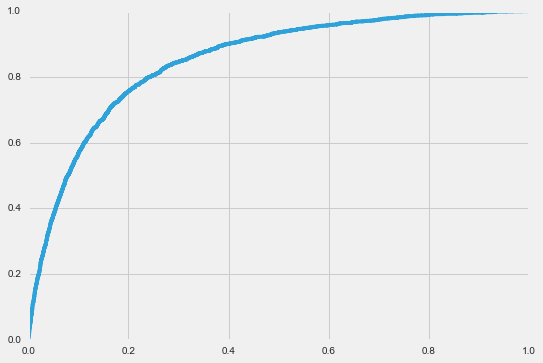

In [244]:
plt.plot(roc_train[0], roc_train[1])

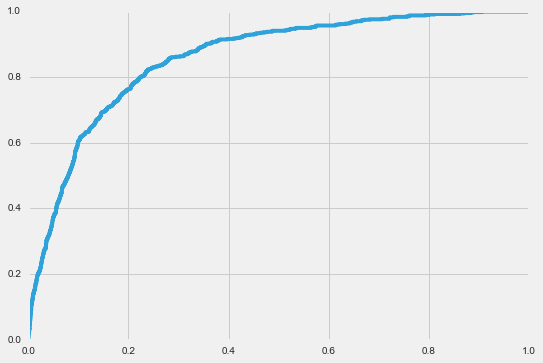

In [245]:
plt.plot(roc_test[0], roc_test[1])

In [247]:
cv_scores = cross_val_score(LogisticRegression(class_weight="balanced"), x1, np.ravel(y1), scoring='accuracy', cv=10)
print "Accuracy Scores"
print cv_scores
print "Accuracy Score mean"
print cv_scores.mean()
print "\n", "________________________________________________________________________________________________", "\n"

cv_scores_f1 = cross_val_score(LogisticRegression(), x1, np.ravel(y1), scoring='f1', cv=10)
print "F1 Scores"
print cv_scores_f1
print "F1 mean"
print cv_scores_f1.mean()

print "\n", "________________________________________________________________________________________________", "\n"

cv_scores_recall = cross_val_score(LogisticRegression(), x1, np.ravel(y1), scoring='recall', cv=10)
print "Recall Scores"
print cv_scores_recall
print "Recall mean"
print cv_scores_recall.mean()

print "\n", "________________________________________________________________________________________________","\n"

cv_scores_precision = cross_val_score(LogisticRegression(), x1, np.ravel(y1), scoring='precision', cv=10)
print "Precision Scores"
print cv_scores_precision
print "Precision mean"
print cv_scores_precision.mean()

Accuracy Scores
[ 0.78849722  0.86889301  0.76035869  0.65635633  0.80791834  0.90906279
  0.87658521  0.86235694  0.77358491  0.63501392]
Accuracy Score mean
0.793862735883

________________________________________________________________________________________________ 

F1 Scores
[ 0.26484018  0.24641834  0.2997543   0.21932115  0.21348315  0.23780488
  0.19596542  0.18126888  0.23136247  0.17299578]
F1 mean
0.226321454195

________________________________________________________________________________________________ 

Recall Scores
[ 0.20138889  0.14930556  0.21180556  0.14634146  0.13240418  0.1358885
  0.1184669   0.10452962  0.15679443  0.14285714]
Recall mean
0.149978222997

________________________________________________________________________________________________ 

Precision Scores
[ 0.38666667  0.70491803  0.51260504  0.4375      0.55072464  0.95121951
  0.56666667  0.68181818  0.44117647  0.21989529]
Precision mean
0.545319049838


In [273]:
final["white_share_scale"] = scale(final["white_share"])
final["no_hs_scale"] = scale(final["no_hs_percent"])
final["poverty_rate_scale"] = scale(final["poverty_rate"])
final["un_rate_scale"] = scale(final["un_rate"])
dff = final[["target", "white_share_scale", "no_hs_scale", "median_income_scale", "poverty_rate_scale", "un_rate_scale"]].copy()

In [274]:
yy = dff["target"].copy()
xx = dff[["white_share_scale", "no_hs_scale","median_income_scale", "poverty_rate_scale", "un_rate_scale"]].copy()
yy = np.ravel(yy)

In [275]:
logg = Logit(yy,xx)
logg = logg.fit()
logg.summary()

Optimization terminated successfully.
         Current function value: 0.685064
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                32333
Model:                          Logit   Df Residuals:                    32328
Method:                           MLE   Df Model:                            4
Date:                Mon, 09 May 2016   Pseudo R-squ.:                  -1.284
Time:                        15:18:58   Log-Likelihood:                -22150.
converged:                       True   LL-Null:                       -9696.2
                                        LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
white_share_scale      -0.2541      0.013    -19.730      0.000        -0.279    -0.229
no_hs_scale            -0.0101      0.013     -0.782      0.434        -0.035     0.015
median_income_scale     0.0005      0.014      0.033      0.974        -0.027     0.028
poverty_rate_scale      0.0285      0.015      1.921      0.055        -0.001     0.058
un_rate_scale          -0.0061      0.013     -0.487      0.626        -0.031     0.019
=======================================================================================
"""

In [276]:
lg = LogisticRegression()
lg = lg.fit(xx,yy)
lg.score(xx,yy)

0.91083413231064236

In [277]:
cof = pd.DataFrame(zip(xx.columns, np.transpose(lg.coef_)), columns=["coef", "value"])

In [278]:
e= [i[0,] for i in cof.value]

In [279]:
e = list(e)

In [280]:
e = np.asarray(e)

In [281]:
cof["value"] = e

In [282]:
cof.value.astype(float, inplace=True)

0   -0.532984
1   -0.015939
2    0.031405
3    0.082725
4   -0.036767
Name: value, dtype: float64

In [283]:
cof.dtypes

coef      object
value    float64
dtype: object

In [284]:
from math import e

In [285]:
cof["e"] = np.e**cof["value"]

In [286]:
cof

,coef,value,e
0,white_share_scale,-0.532984,0.586851
1,no_hs_scale,-0.015939,0.984187
2,median_income_scale,0.031405,1.031904
3,poverty_rate_scale,0.082725,1.086243
4,un_rate_scale,-0.036767,0.963901


In [287]:
# lg = LogisticRegression()
# lg = lg.fit(xx,yy)
# lg.score(xx,yy)


def log_reg_sklearn(table):
    x = table.iloc[:,1:]
    y = table[[0]]
    y = np.ravel(y)
    model = LogisticRegression(class_weight="balanced")
    model = model.fit(x,y)
    df = pd.DataFrame(zip(x.columns, np.transpose(model.coef_)), columns=["coef", "value"])
    f = np.asarray([i[0,] for i in df.value])
    df["value"] = f
    df["e"] = np.e**f
    return df
    

In [288]:
log_reg_sklearn(dff)

,coef,value,e
0,white_share_scale,-0.701208,0.495986
1,no_hs_scale,-0.051208,0.950081
2,median_income_scale,0.054823,1.056354
3,poverty_rate_scale,0.140622,1.150989
4,un_rate_scale,0.002458,1.002461


In [289]:
fd = dff.copy()

In [290]:
fd.head()

,target,white_share_scale,no_hs_scale,median_income_scale,poverty_rate_scale,un_rate_scale
0,1,-0.730828,-0.314910,0.108783,-0.316877,0.115866
1,1,-1.971253,2.385235,-1.521251,3.782409,1.724995
2,1,0.227611,-0.103484,0.187648,0.033062,-0.654893
3,1,0.236111,1.528542,-0.531910,0.607962,0.900148
4,1,-2.961301,1.892925,-0.248833,0.299683,0.548573


In [292]:
dff.groupby("target").median()

,white_share_scale,no_hs_scale,median_income_scale,poverty_rate_scale,un_rate_scale
target,,,,,
0,0.468539,-0.226692,-0.162652,-0.241890,-0.181620
1,-0.381185,0.010536,-0.291745,0.183036,0.115866


In [293]:
def pred_log(table):
    x = table.iloc[:,1:]
    y = table[[0]]
    y = np.ravel(y)
    model = LogisticRegression(class_weight="balanced")
    model = model.fit(x,y)
    df = pd.DataFrame(zip(x.columns, np.transpose(model.coef_)), columns=["coef", "value"])
    f = np.asarray([i[0,] for i in df.value])
    df["value"] = f
    df["e"] = np.e**f
    return df

In [919]:
# p